In [2]:
#|default_exp app
!pip install -Uqq fastai gradio nbdev

In [3]:
#|export
from fastai.vision.all import *
import gradio as gr

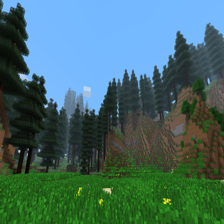

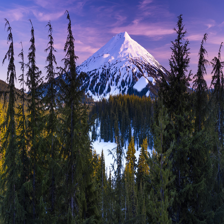

In [18]:
imgPaths = ['samples/minecraft.jpeg', 'samples/real-world.jpeg']
images = []

for i in imgPaths:
    im = PILImage.create(i)
    images.append(im.resize((224,224)))
    
for im in images:
    im.show()

In [5]:
#|export
learn = load_learner('app/model.pkl')

In [11]:
for im in images:
    print(learn.predict(im))

('minecraft', TensorBase(0), TensorBase([0.9707, 0.0293]))


('real-world', TensorBase(1), TensorBase([7.8269e-04, 9.9922e-01]))


In [12]:
#|export
categories = ('Minecraft', 'Real World')

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [16]:
classify_image(images[0])

{'Minecraft': 0.97066730260849, 'Real World': 0.02933271788060665}

In [21]:
#|export
image = gr.Image(shape=(224,224))
labels = gr.Label()
examples = ['samples/minecraft.jpg', 'samples/real-world.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=labels, examples=examples, allow_flagging="never")
intf.launch(inline=False, server_port=8080)

/usr/local/lib/python3.9/dist-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.9/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://2f47bd20d5c0996e37.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


In [30]:
import nbdev

nbdev.export.nb_export('app.ipynb', 'app')